# Gradient Descent Intro
 <p>

In [2]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [1]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [21]:
n=30
x = random(n)
y = lin(a,b,x)

In [17]:
x

array([ 0.0132,  0.4765,  0.0034,  0.8314,  0.5044,  0.0817,  0.7193,  0.8595,  0.7664,  0.0203,
        0.4296,  0.5188,  0.2627,  0.4388,  0.3663,  0.0792,  0.5146,  0.9705,  0.4546,  0.0884,
        0.9854,  0.3523,  0.5519,  0.1516,  0.1063,  0.0296,  0.9777,  0.3856,  0.5225,  0.2138])

In [18]:
y

array([  8.0395,   9.4294,   8.0103,  10.4941,   9.5131,   8.245 ,  10.1578,  10.5785,  10.2991,
         8.061 ,   9.2889,   9.5564,   8.7882,   9.3164,   9.099 ,   8.2375,   9.5439,  10.9116,
         9.3637,   8.2653,  10.9562,   9.0568,   9.6556,   8.4548,   8.3188,   8.0888,  10.9331,
         9.1568,   9.5675,   8.6414])

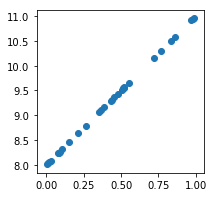

In [19]:
plt.scatter(x,y)

In [22]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [23]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.9867

In [24]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [14]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [15]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani